<a href="https://colab.research.google.com/github/HofstraDoboli/TextMining_F22/blob/main/movie_clustering_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import os
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn import metrics


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/TextMining_F22
%ls *.csv

/content/drive/MyDrive/TextMining_F22
wiki_movie_plots_deduped.csv


In [4]:
dir_file = os.getcwd() # returns path to current directory
files_dir = os.listdir(dir_file)  # list of files in current directory

csv_files = [f for f in files_dir if f.endswith('csv')]
print(csv_files)
movie_file = csv_files[0]

movie_df = pd.read_csv(movie_file)
print(movie_df.columns)  # the columns
print(movie_df.shape)

['wiki_movie_plots_deduped.csv']
Index(['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre', 'Wiki Page', 'Plot'],
      dtype='object')
(34886, 8)


In [ ]:
movie_df.Genre.value_counts()[:40]

unknown            6083
drama              5964
comedy             4379
horror             1167
action             1098
thriller            966
romance             923
western             865
crime               568
adventure           526
musical             467
crime drama         464
romantic comedy     461
science fiction     418
film noir           345
mystery             310
war                 273
animation           264
comedy, drama       236
sci-fi              221
family              217
fantasy             204
animated            195
musical comedy      154
comedy-drama        137
biography           136
anime               112
suspense            104
romantic drama      103
comedy drama        103
animated short       91
drama, romance       86
social               82
historical           77
action thriller      73
documentary          73
serial               71
world war ii         70
family drama         66
war drama            65
Name: Genre, dtype: int64

In [ ]:
# genres
movie_df.Genre[movie_df.Genre == 'sci-fi'].value_counts()

sci-fi    221
Name: Genre, dtype: int64

In [5]:
choose_genres = ['western', 'thriller', 'sci-fi']
select_movies = movie_df[['Plot', 'Genre']][movie_df['Genre'].isin(choose_genres)]
select_movies.Genre.value_counts()

thriller    966
western     865
sci-fi      221
Name: Genre, dtype: int64

In [6]:
import numpy as np
import spacy   # another tokenizer, lemmatizer (has --> be)
nlp = spacy.load('en_core_web_sm')
nlp.disable_pipes('parser', 'ner')

['parser', 'ner']

In [7]:
def nlp_processing(doc): # from indexing.ipyns
    tokens = nlp(doc)

    #print(type(tokens))
    # eliminates stop words  and non alpha num and converts all to lower case
    terms = [token.lemma_.lower() for token in tokens if not token.is_stop and token.is_alpha]

    return terms

vect = CountVectorizer(tokenizer = nlp_processing, min_df = 10, max_df = 0.5) # ? why 50

counter = vect.fit_transform(select_movies['Plot'])
 # matrix representation of each movie as a tf-idf vector
print(len(vect.get_feature_names_out())) # number of terms extracted (length of the vocabulary)

print(vect.get_feature_names_out()[:100])
print(vect.get_feature_names_out()[-20:])

print(counter.shape)
tf_all = counter.sum(axis = 0)
print(tf_all.shape)
ind_terms_sorted = tf_all.argsort()
print(ind_terms_sorted.shape)
print(tf_all[0,ind_terms_sorted[0,0:20]])
print(tf_all[0,ind_terms_sorted[0,-20:]])
print('rarest', vect.get_feature_names_out()[ind_terms_sorted[0,:20]])
print('most common', vect.get_feature_names_out()[ind_terms_sorted[0,-20:]])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


3926
['abandon' 'abduct' 'abduction' 'abductor' 'ability' 'able' 'aboard'
 'abort' 'abraham' 'abruptly' 'absence' 'absorb' 'abuse' 'abusive'
 'accept' 'access' 'accident' 'accidental' 'accidentally' 'accompany'
 'accomplice' 'accomplish' 'accord' 'accost' 'account' 'accusation'
 'accuse' 'ace' 'achieve' 'acid' 'acknowledge' 'acquaint' 'acquaintance'
 'acquire' 'acquit' 'act' 'action' 'activate' 'active' 'activity' 'actor'
 'actress' 'actual' 'actually' 'adam' 'add' 'addict' 'addition'
 'additional' 'address' 'adjacent' 'administer' 'admire' 'admit' 'adopt'
 'adoptive' 'adult' 'advance' 'advanced' 'advantage' 'adventure' 'advice'
 'advise' 'aerial' 'affair' 'affect' 'affection' 'afford' 'afraid'
 'africa' 'african' 'aftermath' 'afternoon' 'afterward' 'age' 'aged'
 'agency' 'agent' 'aggressive' 'ago' 'agree' 'agreement' 'ahead' 'aid'
 'aide' 'ail' 'aim' 'air' 'aircraft' 'airline' 'airport' 'ajay' 'aka' 'al'
 'alan' 'alarm' 'albert' 'alcohol' 'alcoholic' 'alert']
['write' 'writer' 'wrong'

In [125]:
query = ["aliens spaceship"]
vect_query = vect.transform(query)
vect_query_array = vect_query.toarray()
print(vect_query_array.shape)
words_query = vect.inverse_transform(vect_query)
print(words_query)

(1, 3926)
[array(['alien', 'spaceship'], dtype='<U16')]


In [ ]:
# Don't use the default text processing in CountVectorizer
vect1 = CountVectorizer(stop_words = "english", lowercase = True, min_df = 10)
counter1 = vect1.fit_transform(select_movies['Plot'])
print(len(vect1.get_feature_names_out()))

print(vect1.get_feature_names_out()[:100])
print(vect1.get_feature_names_out()[-20:])

4981
['000' '10' '100' '11' '12' '14' '15' '16' '18' '1880' '1880s' '19th' '20'
 '200' '22' '24' '25' '30' '40' '50' '500' '60' '7th' 'abandon'
 'abandoned' 'abandons' 'abduct' 'abducted' 'abduction' 'abducts'
 'abilities' 'ability' 'able' 'aboard' 'abraham' 'abruptly' 'absence'
 'abuse' 'abused' 'abusive' 'accept' 'accepted' 'accepts' 'access'
 'accident' 'accidental' 'accidentally' 'accompanied' 'accompanies'
 'accompany' 'accompanying' 'accomplice' 'accomplices' 'accomplished'
 'according' 'account' 'accounts' 'accusations' 'accuse' 'accused'
 'accuses' 'accusing' 'ace' 'achieve' 'acid' 'acknowledges' 'acquaintance'
 'acquaintances' 'acquainted' 'acquire' 'acquired' 'acquitted' 'act'
 'acting' 'action' 'actions' 'activates' 'active' 'activities' 'activity'
 'actor' 'actress' 'acts' 'actual' 'actually' 'adam' 'adams' 'added'
 'addict' 'addicted' 'addition' 'additional' 'address' 'addresses' 'adds'
 'adjacent' 'admit' 'admits' 'admitted' 'admitting']
['writing' 'written' 'wrong' 'wron

In [10]:
transf  = TfidfTransformer(norm = None, sublinear_tf = True) # norm = None => no normalization just tf-idf vectors
# TfidfTransformer takes the CountVectorizer output and computes the tf-idf
tf_idf = transf.fit_transform(counter)

In [ ]:
from sklearn.metrics import pairwise_distances
m = 'cosine' # 'l2', 'cosine'
print(np.mean(pairwise_distances(tf_idf, metric = m)))
print(np.max(pairwise_distances(tf_idf, metric = m)))
#print(np.min(pairwise_distances(tf_idf, metric = m)))


0.9545944699795956
1.0


In [11]:
# use nltk kmeans clusterer
from nltk.cluster import KMeansClusterer, cosine_distance, euclidean_distance
k_clusters = 5
model_nltk = KMeansClusterer(k_clusters,distance = cosine_distance, repeats=10, conv_test=1e-03, initial_means=None,
                             normalise=False, svd_dimensions= None, rng=None, avoid_empty_clusters=False)

out_kmeans = model_nltk.cluster(tf_idf.toarray(), assign_clusters= True, trace = False) # returns a list with cluster indices

In [24]:
print(len(out_kmeans))
labels = np.array(out_kmeans)
centroids_nltk = np.array(model_nltk.means())
print(centroids_nltk.shape) # list of arrays

2052
(5, 3926)


In [76]:
import math
def my_cos_dist(u, v):
    return  1 - (np.dot(u, v) / (math.sqrt(np.dot(u, u)) * math.sqrt(np.dot(v, v))))

d = my_cos_dist(vect_query_array[0,:],  centroids_nltk[0,:])
print(d)

0.18929629782104201 2.0 10.578485206361762
0.9910527691759118


In [134]:
dist2centroid = np.zeros(k_clusters)
print(dist2centroid.shape)
for i in range(k_clusters):
  dist2centroid[i] = my_cos_dist(vect_query_array[0,:], centroids_nltk[i,:]) # dist_q2centr[i] =
print(dist2centroid)
index_sorted = np.argsort(dist2centroid)
print(index_sorted)
closest_cluster = index_sorted[0]
print(closest_cluster)

(5,)
[1.         0.99740286 1.         0.87716733 0.99374422]
[3 4 1 0 2]
3


In [143]:
# compute distances to movies inside the closest cluster
# index to the movies inside the closest cluster
index_movies = np.where(labels == closest_cluster)[0]
print(index_movies[:5])
print(labels[index_movies[:5]])
dist2movies = np.zeros(len(index_movies)) # a vectod of zeros
tf_idf_array = tf_idf.toarray() # convert to full matrix from sparse matrix
print(tf_idf_array.shape)

for i, ind in  enumerate(index_movies):
  dist2movies[i] = my_cos_dist(vect_query_array[0,:], tf_idf_array[ind,:])

arg_sort_movies = np.argsort(dist2movies, axis = 0)
print(dist2movies[arg_sort_movies[:5]])
closest_movies = arg_sort_movies[:5]
print(closest_movies)
print(dist2movies[closest_movies])
for m in closest_movies:
  index_movie = index_movies[m]
  print(index_movie)
  print(select_movies.iloc[index_movie].Plot)

[ 67  69 169 192 197]
[3 3 3 3 3]
(2052, 3926)
[0.67731312 0.69337414 0.72893476 0.74734727 0.80741581]
[  8  69 214  59 170]
[0.67731312 0.69337414 0.72893476 0.74734727 0.80741581]
382
A spaceship from a previously unknown planet lands in the Scottish moors, bringing a humanoid alien to Earth near the observatory of Professor Elliot (Raymond Bond), just days before the mysterious Planet X will pass closest to our planet. When the professor and his friend, American reporter John Lawrence (Robert Clarke), discover the spaceman, they help it when it is in distress and try to communicate with it, failing in their attempt. They leave, and the alien follows them. A colleague of the professor, the unscrupulous and ambitious scientist Dr. Mears (William Schallert), discovers that the humanoid peaks in musical tones and tries to force from it the metal formula for its spaceship. He shuts off its breathing apparatus and leaves the spaceman for dead, telling the professor that communication was

In [139]:
# compute distances to movies inside the closest cluster
# index to the movies inside the closest cluster

dist_all_movies = np.zeros(len(tf_idf_array))
for i in range(len(tf_idf_array)):
  dist_all_movies[i] = my_cos_dist(vect_query_array[0,:], tf_idf_array[i,:])

arg_sort_all_movies = np.argsort(dist_all_movies, axis = 0)
closest_all_movies = arg_sort_all_movies[:5]
print(closest_all_movies)
print(labels[closest_all_movies])
print(dist_all_movies[closest_all_movies])
for m in closest_all_movies:
  print(m)
  print(select_movies.iloc[m].Plot)

[ 382  844 1697  810 1459]
[3 3 3 3 3]
[0.67731312 0.69337414 0.72893476 0.74734727 0.80741581]
382
A spaceship from a previously unknown planet lands in the Scottish moors, bringing a humanoid alien to Earth near the observatory of Professor Elliot (Raymond Bond), just days before the mysterious Planet X will pass closest to our planet. When the professor and his friend, American reporter John Lawrence (Robert Clarke), discover the spaceman, they help it when it is in distress and try to communicate with it, failing in their attempt. They leave, and the alien follows them. A colleague of the professor, the unscrupulous and ambitious scientist Dr. Mears (William Schallert), discovers that the humanoid peaks in musical tones and tries to force from it the metal formula for its spaceship. He shuts off its breathing apparatus and leaves the spaceman for dead, telling the professor that communication was hopeless.
Soon, Lawrence discovers that the alien is gone, as is the professor's daugh

In [ ]:
print("\nSilhouette Coefficient: %0.3f" %metrics.silhouette_score(tf_idf, out_kmeans, metric = "cosine"))


Silhouette Coefficient: 0.013


In [133]:
print("Top terms per cluster:")
order_centroids = centroids_nltk.argsort()[:, ::-1]  # sort and reverse the weights for each term
terms = vect.get_feature_names_out()

for i in range(k_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:  # print first ten terms from the cluster
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 town
 ranch
 sheriff
 man
 ride
 shoot
 gang
 cattle
 horse
 brother
Cluster 1:
 police
 murder
 life
 wife
 go
 day
 try
 tell
 friend
 take
Cluster 2:
 man
 indians
 fort
 army
 horse
 apache
 indian
 war
 attack
 wagon
Cluster 3:
 earth
 ship
 alien
 scientist
 human
 destroy
 dr
 creature
 planet
 crew
Cluster 4:
 police
 tell
 leave
 car
 house
 man
 go
 later
 take
 reveal


In [ ]:
from collections import Counter
# compute purity
# in each cluster - find # of dramas/ # commedies
# choose the max in each cluster = purity per cluster
# sum purity in each cluster/# number of movies
import numpy as np
genre = pd.Categorical(select_movies.Genre)

#print(genre.shape, index_cluster1.shape, index_cluster2.shape)
purity = np.zeros((k_clusters,1))
for c in range(k_clusters):
    # extract labeks of each genre and count them
    index_cluster = labels == c;
    count_genre = Counter(genre[index_cluster])
    print(c, count_genre)
    purity[c] = max(count_genre.values())

total_purity = np.sum(purity)/len(genre)
print(total_purity)

0 Counter({'western': 188, 'thriller': 1})
1 Counter({'western': 420, 'thriller': 24, 'sci-fi': 2})
2 Counter({'western': 234, 'thriller': 7})
3 Counter({'thriller': 786, 'sci-fi': 22, 'western': 17})
4 Counter({'sci-fi': 197, 'thriller': 148, 'western': 6})
0.8893762183235867


(2052, 2)


/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


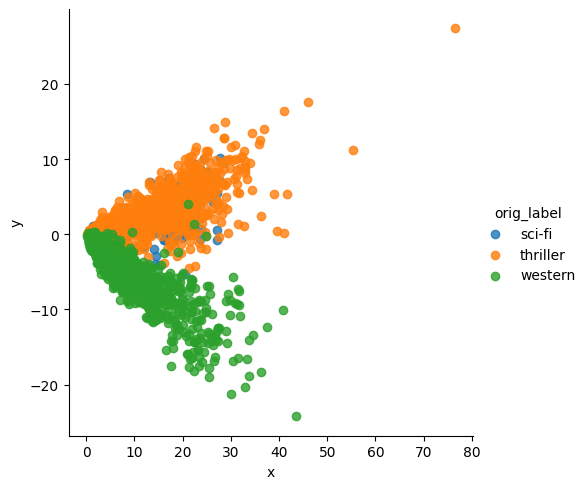

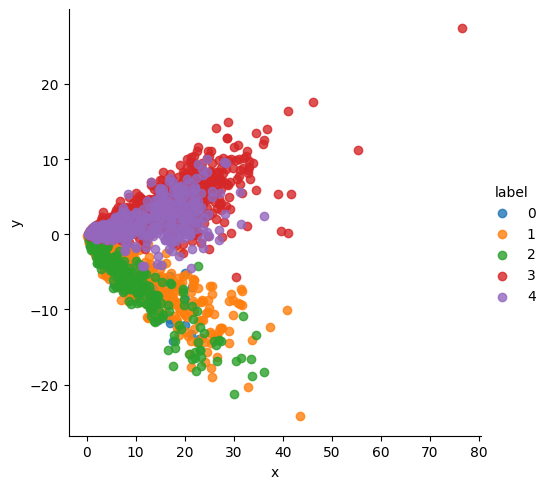

In [ ]:
# plot clusters
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(n_components = 2)
#print('explained variance')
pca.fit(tf_idf)
x2 = pca.transform(tf_idf)

print(x2.shape)
# add labels
data_x2 = pd.DataFrame(x2, columns = ['x','y'])
data_x2['label'] = labels
data_x2['orig_label'] = genre
data_x2.head()

sb.lmplot(data=data_x2, x='x', y='y', hue='orig_label',fit_reg=False, legend=True, legend_out=True)
sb.lmplot(data=data_x2, x='x', y='y', hue='label',fit_reg=False, legend=True, legend_out=True)

In [ ]:
inertia = {}
for k_clusters in range(2,11):
  model = KMeans(n_clusters = k_clusters,n_init = 10, verbose = False) # repeats the algorithm for 10 initializations
# returns the best model
# model = MiniBatchKMeans(n_clusters=k_clusters, init='k-means++', max_iter=100, batch_size = 5000,
#                        n_init = 10, verbose = 0)

  model.fit(tf_idf)
  inertia[k_clusters] = model.inertia_
  print("\nSilhouette Coefficient: %0.3f" %metrics.silhouette_score(tf_idf, model.labels_, metric = "l2"))


Silhouette Coefficient: 0.163

Silhouette Coefficient: 0.163

Silhouette Coefficient: 0.096

Silhouette Coefficient: 0.104

Silhouette Coefficient: -0.003

Silhouette Coefficient: 0.152

Silhouette Coefficient: 0.148

Silhouette Coefficient: 0.121

Silhouette Coefficient: -0.022


In [ ]:
inertia

{2: 5464956.135653507,
 3: 5443086.033641389,
 4: 5454195.960143218,
 5: 5452166.772448005,
 6: 5435137.870356604,
 7: 5403729.995064098,
 8: 5427315.461164242,
 9: 5376373.652666042,
 10: 5383642.391008159}

In [ ]:
# choose k_clusters
k_clusters = 3
model = KMeans(n_clusters = k_clusters,n_init = 50, verbose = False) # repeats the algorithm for 10 initializations
model.fit(tf_idf)
print("\nSilhouette Coefficient: %0.3f" %metrics.silhouette_score(tf_idf, model.labels_, metric = "l2"))


Silhouette Coefficient: 0.163


In [ ]:
print("Top terms per cluster:")
print(model.cluster_centers_.shape)
order_centroids = model.cluster_centers_.argsort()[:, ::-1]  # sort and reverse the weights for each term
terms = vect.get_feature_names_out()

for i in range(k_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:  # print first ten terms from the cluster
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
(3, 3928)
Cluster 0:
 man
 kill
 town
 find
 murder
 take
 try
 love
 leave
 shoot
Cluster 1:
 kill
 tell
 find
 leave
 man
 take
 shoot
 return
 later
 go
Cluster 2:
 sarah
 noah
 grand
 central
 pattern
 jake
 exactly
 cab
 station
 necklace


In [ ]:
# compute homogeneity with genre labels

# get genre for the selected movies
genre = pd.Categorical(select_movies.Genre)

print("Homogeneity: %0.3f"  % metrics.homogeneity_score(genre, model.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(genre, model.labels_))
print("V-measure: %0.3f"    % metrics.v_measure_score(genre, model.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(genre, model.labels_))

Homogeneity: 0.048
Completeness: 0.070
V-measure: 0.057
Adjusted Rand-Index: 0.068


In [ ]:
from collections import Counter
# compute purity
# in each cluster - find # of dramas/ # commedies
# choose the max in each cluster = purity per cluster
# sum purity in each cluster/# number of movies
import numpy as np

#print(genre.shape, index_cluster1.shape, index_cluster2.shape)
purity = np.zeros((k_clusters,1))
for c in range(k_clusters):
    # extract labeks of each genre and count them
    index_cluster = model.labels_ == c;
    count_genre = Counter(genre[index_cluster])
    print(c, count_genre)
    purity[c] = max(count_genre.values())

total_purity = np.sum(purity)/len(genre)
print(total_purity)

0 Counter({'western': 687, 'thriller': 512, 'sci-fi': 93})
1 Counter({'thriller': 453, 'western': 178, 'sci-fi': 128})
2 Counter({'thriller': 1})
0.5560428849902534


In [ ]:
cluster = 4
index = model.labels_ == cluster
select_movies[index]

,Plot,Genre
3236,"In late 1941, Captain Rick Leland (Humphrey Bo...",thriller


In [ ]:
# plot clusters
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(n_components = 2)
#print('explained variance')
pca.fit(tf_idf)
x2 = pca.transform(tf_idf)

In [ ]:
print(x2.shape)
# add labels
data_x2 = pd.DataFrame(x2, columns = ['x','y'])
data_x2['label'] = model.labels_
data_x2['orig_label'] = genre
data_x2.head()

(2052, 2)


,x,y,label,orig_label
0,8.681313,-2.783567,5,western
1,5.211681,-3.802586,5,western
2,1.698738,-0.705988,5,western
3,1.304705,-0.529587,5,western
4,9.350912,-2.697742,5,western


/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


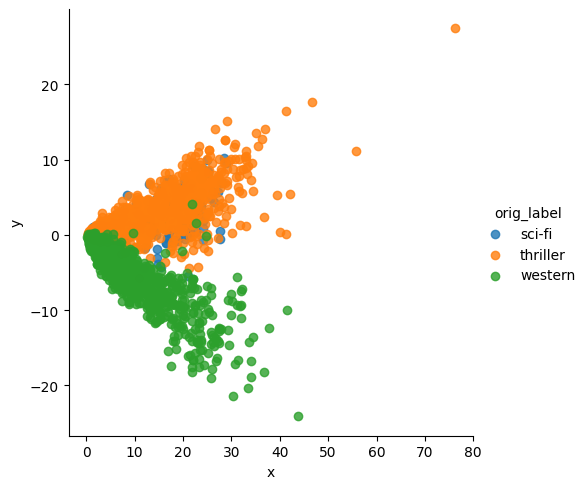

In [ ]:
sb.lmplot(data=data_x2, x='x', y='y', hue='orig_label',fit_reg=False, legend=True, legend_out=True)

/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


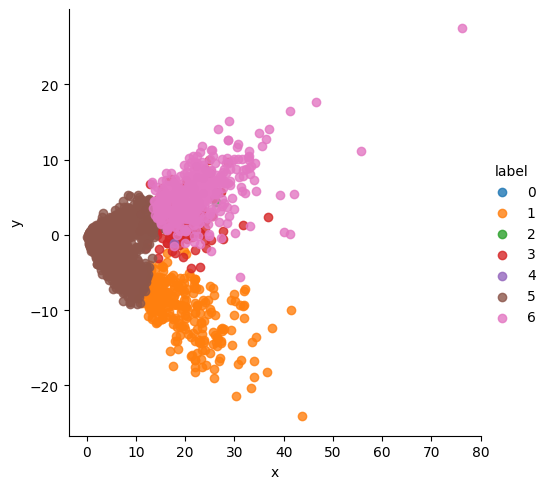

In [ ]:
sb.lmplot(data=data_x2, x='x', y='y', hue='label',fit_reg=False, legend=True, legend_out=True)

In [ ]:
# check some data points - ??

# find index for drama movies
index_drama =  select_movies['Genre'].isin(['thriller'])
index_comedy = select_movies['Genre'].isin(['western'])

print(sorted(Counter(model.labels_[index_drama]).items(),key =
             lambda kv:(kv[1], kv[0]), reverse =True))
print(sorted(Counter(model.labels_[index_comedy]).items(),key =
             lambda kv:(kv[1], kv[0]), reverse =True))


[(5, 510), (6, 394), (3, 57), (1, 2), (0, 2), (4, 1)]
[(5, 607), (1, 254), (6, 4)]


##SVD dimensionality reduction

In [ ]:
# project Tfidf model onto singular value decomposition - LSI transform and then do clustering
from sklearn.decomposition import TruncatedSVD

dim = 1000 # 1300 dimensions explain 95% variance
svd = TruncatedSVD(n_components=dim, n_iter = 10)

lsi = svd.fit_transform(tf_idf)
explained_variance = svd.explained_variance_ratio_.sum()
print("Sum of explained variance ratio: %d%%" % (int(explained_variance * 100)))

Sum of explained variance ratio: 91%


In [ ]:
lsi.shape


(2052, 800)

In [ ]:
from sklearn.metrics import pairwise_distances
m = 'l1' # 'l2', 'cosine'
print(np.mean(pairwise_distances(tf_idf, metric = m)))
print(np.max(pairwise_distances(tf_idf, metric = m)))

print(np.mean(pairwise_distances(lsi, metric = m)))
print(np.max(pairwise_distances(lsi, metric = m)))
#print(np.min(pairwise_distances(tf_idf, metric = m)))

923.1287806909914
4315.105872009937
1545.4313573756956
2487.737735414181


In [ ]:
# check singular values
print(svd.singular_values_[:min(dim,20)])

Sum of explained variance ratio: 32%
[11.37668659  4.99886657  3.89349417  3.31033615  3.19558691  3.09193352
  3.00330526  2.83227131  2.81027512  2.73065076  2.70626273  2.66013061
  2.65617477  2.62511866  2.59663756  2.59053353  2.57336299  2.54722217
  2.51866679  2.49960796]


In [ ]:
k_clusters = 10
#model_lsi = MiniBatchKMeans(n_clusters=k_clusters, init='k-means++', max_iter=200, batch_size=5000,
#                       n_init = 10)
model_lsi = KMeans(n_clusters=k_clusters, init='k-means++', max_iter=300,
                        n_init = 10)
model_lsi.fit(lsi)
print("\nSilhouette Coefficient: %0.3f" %metrics.silhouette_score(tf_idf, model_lsi.labels_, metric = "euclidean"))


Silhouette Coefficient: 0.095


In [ ]:
from collections import Counter
# compute purity
# in each cluster - find # of dramas/ # commedies
# choose the max in each cluster = purity per cluster
# sum purity in each cluster/# number of movies
import numpy as np

genre = pd.Categorical(select_movies.Genre)


#print(genre.shape, index_cluster1.shape, index_cluster2.shape)
purity = np.zeros((k_clusters,1))
for c in range(k_clusters):
    # extract labeks of each genre and count them
    index_cluster = model_lsi.labels_ == c;
    count_genre = Counter(genre[index_cluster])
    print(c, count_genre)
    purity[c] = max(count_genre.values())

total_purity = np.sum(purity)/len(genre)
print(total_purity)

0 Counter({'sci-fi': 1})
1 Counter({'thriller': 363, 'western': 171, 'sci-fi': 12})
2 Counter({'thriller': 1})
3 Counter({'thriller': 1})
4 Counter({'sci-fi': 131, 'thriller': 82, 'western': 2})
5 Counter({'thriller': 1})
6 Counter({'sci-fi': 2})
7 Counter({'thriller': 1})
8 Counter({'western': 692, 'thriller': 516, 'sci-fi': 75})
9 Counter({'thriller': 1})
0.5818713450292398


In [ ]:
# plot clusters
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(n_components = 2)
#print('explained variance')
pca.fit(tf_idf)
x2 = pca.transform(tf_idf)

In [ ]:
print(x2.shape)
# add labels
data_x2 = pd.DataFrame(x2, columns = ['x','y'])
data_x2['label'] = model_lsi.labels_
data_x2['orig_label'] = genre
data_x2.head()

(2052, 2)


,x,y,label,orig_label
0,8.681313,-2.777681,8,western
1,5.211681,-3.807645,8,western
2,1.698738,-0.706140,8,western
3,1.304705,-0.529242,8,western
4,9.350912,-2.698043,8,western


/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


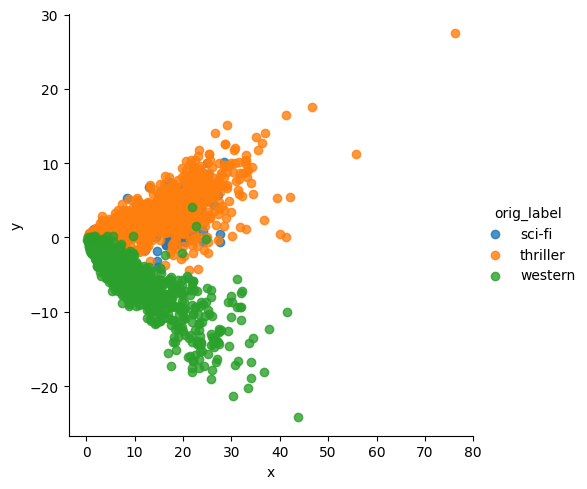

In [ ]:
sb.lmplot(data=data_x2, x='x', y='y', hue='orig_label',fit_reg=False, legend=True, legend_out=True)

/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


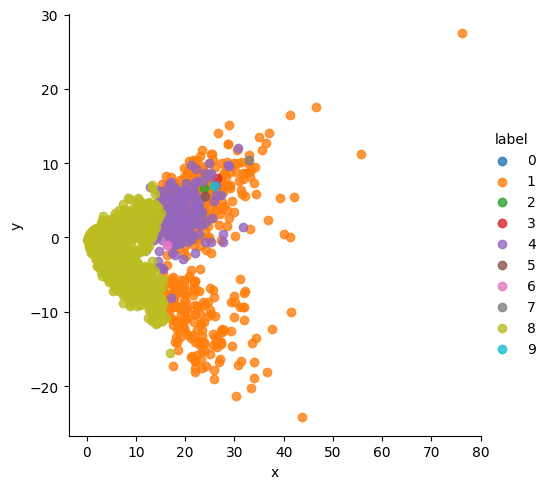

In [ ]:
sb.lmplot(data=data_x2, x='x', y='y', hue='label',fit_reg=False, legend=True, legend_out=True)

##Latent Dirichlet Allocation (LDA) for dimensionality reduction

In [ ]:
# LDA with sklearn
from sklearn.decomposition import LatentDirichletAllocation

num_of_topics = 20 # more topics, better to separate the clusters.
lda_transf = LatentDirichletAllocation(
            n_components = num_of_topics, max_iter= 10,
            learning_method = 'online', batch_size = 128)   # 'online' - faster, uses subset of data
lda = lda_transf.fit_transform(counter)
print(lda.shape)
print(lda_transf.components_.shape)

(2052, 20)
(20, 3921)


In [ ]:
# cluster based on LDA
k_clusters = 3
model_lda = KMeans(k_clusters)
#model_lda = MiniBatchKMeans(n_clusters=k_clusters, init='k-means++', max_iter=200, batch_size=1000,
#                       n_init = 10)
model_lda.fit(lda)
print("\nSilhouette Coefficient: %0.3f" %metrics.silhouette_score(tf_idf, model_lsi.labels_, metric = "euclidean"))


Silhouette Coefficient: 0.004


In [ ]:
# compute homogeneity with genre labels

# get genre for the selected movies
genre = select_movies.Genre.copy()
genre = pd.Categorical(genre)
# labels_genre = genre.codes
# print(type(labels_genre), labels_genre.shape)

print("Homogeneity: %0.3f"  % metrics.homogeneity_score(genre, model_lda.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(genre, model_lda.labels_))
print("V-measure: %0.3f"    % metrics.v_measure_score(genre, model_lda.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(genre, model_lda.labels_))

Homogeneity: 0.218
Completeness: 0.205
V-measure: 0.211
Adjusted Rand-Index: 0.163


In [ ]:
# print top topic indices per cluster
print("Top top words per cluster:")
terms = vect.get_feature_names_out()

# TO DO: order terms in a cluster by tf-idf not just tf
# find movies in each cluster, sum up their counts and print the top words
for k in range(k_clusters):
    index_movies_k = model_lda.labels_ == k
    count_terms_k = sum(counter[index_movies_k,:])   # sum per columns (overall frequency)
    order_terms = count_terms_k.toarray().argsort()[:,::-1].ravel()  # convert to a 1D array
    print('Cluster', k)

    for t in order_terms[:10]:
        print('\t', terms[t], count_terms_k[0,t])

#order_centroids = model_lda.cluster_centers_.argsort()[:, ::-1]  # sort and reverse
#for i in range(k_clusters):
#print("Cluster %d:" % i),
#    for ind in order_centroids[i, :5]:  # print first ten terms from the cluster
#.   print(ind, model_lda.cluster_centers_[i,ind])

Top top words per cluster:
Cluster 0
	 kill 524
	 find 443
	 man 295
	 leave 284
	 escape 251
	 dr 250
	 take 242
	 alien 224
	 discover 221
	 ship 213
Cluster 1
	 kill 1014
	 find 892
	 tell 875
	 man 780
	 leave 715
	 go 635
	 take 607
	 try 556
	 murder 536
	 police 521
Cluster 2
	 kill 1623
	 man 1605
	 find 1107
	 leave 949
	 shoot 804
	 town 782
	 tell 734
	 take 704
	 try 641
	 woman 593


In [ ]:
from collections import Counter
# compute purity
# in each cluster - find # of dramas/ # commedies
# choose the max in each cluster = purity per cluster
# sum purity in each cluster/# number of movies
import numpy as np

#print(genre.shape, index_cluster1.shape, index_cluster2.shape)
purity = np.zeros((k_clusters,1))
for c in range(k_clusters):
    # extract labeks of each genre and count them
    index_cluster = model_lda.labels_ == c;
    count_genre = Counter(genre[index_cluster])
    print(c, count_genre)
    purity[c] = max(count_genre.values())

total_purity = np.sum(purity)/len(genre)
print(total_purity)

0 Counter({'western': 504, 'thriller': 101, 'sci-fi': 11})
1 Counter({'thriller': 660, 'sci-fi': 68, 'western': 40})
2 Counter({'western': 321, 'thriller': 205, 'sci-fi': 142})
0.7236842105263158


In [ ]:
# plot clusters
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(n_components = 2)
#print('explained variance')
pca.fit(tf_idf)
x2 = pca.transform(tf_idf)

In [ ]:
print(x2.shape)
# add labels
data_x2 = pd.DataFrame(x2, columns = ['x','y'])
data_x2['label'] = model_lda.labels_
data_x2['orig_label'] = genre
data_x2.head()

(2052, 2)


,x,y,label,orig_label
0,0.194878,0.045488,2,western
1,0.229486,0.156505,2,western
2,0.109479,0.037860,1,western
3,0.075191,0.039733,2,western
4,0.222659,0.047472,2,western


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


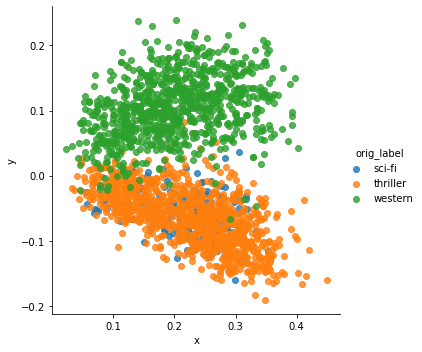

In [ ]:
sb.lmplot(data=data_x2, x='x', y='y', hue='orig_label',fit_reg=False, legend=True, legend_out=True)

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


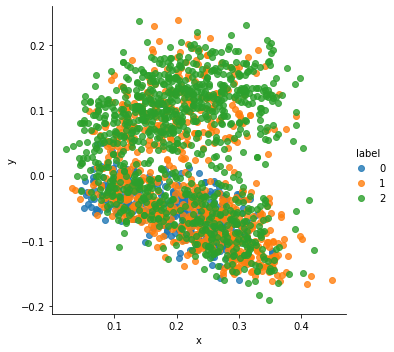

In [ ]:
sb.lmplot(data=data_x2, x='x', y='y', hue='label',fit_reg=False, legend=True, legend_out=True)

In [ ]:
# get largest distribution of words over topics
feature_names = vect.get_feature_names()  # feature_names - array of 8955 components
for topic_idx, topic in enumerate(lda_transf.components_):
        print("Topic %d:" % (topic_idx))
        words = []
        for i in topic.argsort()[:-11:-1]:
            words.append(feature_names[i])
        print(words)

Topic 0:
['vijay', 'chester', 'crawford', 'khan', 'singh', 'kumar', 'morris', 'lease', 'attic', 'betty']
Topic 1:
['ruth', 'patrick', 'terry', 'el', 'corey', 'donald', 'british', 'insane', 'spend', 'edgar']
Topic 2:
['david', 'rachel', 'mrs', 'laura', 'steven', 'jessie', 'ross', 'dr', 'bobby', 'sharon']
Topic 3:
['find', 'peter', 'attack', 'power', 'team', 'world', 'escape', 'destroy', 'scientist', 'use']
Topic 4:
['priya', 'ravi', 'margaret', 'ajay', 'cocaine', 'kumar', 'chennai', 'menon', 'derek', 'sunil']
Topic 5:
['sam', 'matt', 'jane', 'steve', 'adam', 'molly', 'richard', 'angela', 'cheyenne', 'jr']
Topic 6:
['gene', 'frog', 'autry', 'smiley', 'dam', 'conway', 'burnette', 'millhouse', 'baxter', 'mary']
Topic 7:
['martin', 'george', 'susan', 'mike', 'town', 'amanda', 'harris', 'lucy', 'stan', 'preacher']
Topic 8:
['find', 'tell', 'kill', 'house', 'wife', 'leave', 'take', 'go', 'life', 'woman']
Topic 9:
['arjun', 'murphy', 'mumbai', 'audie', 'harry', 'woman', 'father', 'go', 'superi

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# get distribution of each document over the 10 topics
print(lda[100,:])
print(select_movies.iloc[100].Plot)
print(model_lda.labels_[100])

[3.96825397e-04 3.96825397e-04 3.96825400e-04 3.96825407e-04
 3.96825397e-04 1.82212823e-02 5.60165542e-01 3.96825403e-04
 3.96825402e-04 3.96825397e-04 3.96825403e-04 3.96825399e-04
 3.96825405e-04 3.96825408e-04 1.10543913e-01 3.96825406e-04
 3.96825406e-04 3.96825397e-04 3.96825398e-04 3.04720057e-01]
In Red River Valley, Banker Hartley Moore (Frank LaRue) schemes to sabotage the efforts of citizens to secure water rights in order to win water profits for himself. Following the murder of five men who were overseeing the completion of an irrigation system, Gene Autry (Gene Autry) is hired for the dangerous job of "ditch rider", in charge of patrolling the ditches to prevent malfunction or sabotage.
At the Red River Land and Irrigation Company, Steve Conway (Boothe Howard) works for Mary Baxter (Frances Grant) and her father, George Baxter (Sam Flint). Jealous of Mary's attention towards Gene, Conway joins Moore in his scheming actions and hires Bull Dural and his gang to dynamite the

In [ ]:
# get distribution of drama and comedy films over topics
import numpy as np

index_western =  select_movies['Genre'].isin(['western'])
index_thriller  = select_movies['Genre'].isin(['thriller'])
index_sci_fi  = select_movies['Genre'].isin(['sci-fi'])

print(lda[index_western].mean(axis = 0))
print(lda[index_thriller].mean(axis = 0))
print(lda[index_sci_fi].mean(axis = 0))

[0.00507928 0.27857604 0.00763062 0.12786623 0.00762866 0.01803683
 0.02688263 0.0334441  0.24527927 0.24957636]
[0.00620445 0.03241247 0.00858699 0.01678065 0.00509486 0.05094989
 0.39208954 0.10557791 0.22174247 0.16056076]
[0.00892725 0.02085182 0.00402227 0.01742414 0.00204825 0.38262526
 0.25620151 0.05969024 0.17538024 0.07282903]


In [ ]:
# compute purity
# in each cluster - find # of dramas/ # commedies
# choose the max in each cluster = purity per cluster
# sum purity in each cluster/# number of movies
import numpy as np

#print(genre.shape, index_cluster1.shape, index_cluster2.shape)
purity = np.zeros((k_clusters,1))
for c in range(k_clusters):
    # extract labeks of each genre and count them
    index_cluster = model_lda.labels_ == c;
    count_genre = Counter(genre[index_cluster])
    print(c, count_genre)
    purity[c] = max(count_genre.values())

total_purity = np.sum(purity)/len(genre)
print(total_purity)

0 Counter({'western': 843, 'thriller': 390})
1 Counter({'thriller': 576, 'western': 22})
0.774986346258875


In [ ]:
# print top topic indices per cluster
print("Top topic indices per cluster:")
order_centroids = model_lda.cluster_centers_.argsort()[:, ::-1]  # sort and reverse

for i in range(k_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :5]:  # print first ten terms from the cluster
        print(ind, model_lda.cluster_centers_[i,ind])


Top topic indices per cluster:
Cluster 0:
9 0.4221994235929714
10 0.06663026725569314
19 0.06101264107765858
12 0.055693570566070785
4 0.046813705108514424
Cluster 1:
14 0.3118490779208042
10 0.135482348368683
19 0.06760445219950605
0 0.06056345843602185
2 0.05995493746572067
Cluster 2:
3 0.47380302333471713
1 0.1590969321525035
14 0.07027183126831037
2 0.06763853984228954
0 0.05233643964613286
Cluster 3:
5 0.3354123265694002
0 0.09532841300036224
12 0.07923350212374386
2 0.06204251082006643
1 0.05365243380523477
Cluster 4:
4 0.4501876430265231
2 0.07024905299808681
17 0.05276770277018553
0 0.045419732905804845
9 0.043156412951773276
Cluster 5:
0 0.4601834014408931
2 0.0808436134342607
1 0.061290924615599277
19 0.0554040504742478
12 0.040660721842034085
Cluster 6:
2 0.5110900924263934
0 0.0566580310484818
1 0.05625868690453718
19 0.049852684176594796
4 0.03372263080546655
Cluster 7:
1 0.4627882932537935
3 0.08866726514452904
2 0.07096231596833118
0 0.06783987672222201
19 0.043560380019

In [ ]:
# find the closest movie to a another movie using tf-idf, lda and lsi embeddings

def similar_movie(movie_id, all_embed):

    nr_movies   = all_embed.shape[0]  # number of rows = nr of movies
    movie_embed = all_embed[movie_id,:]


    dist = all_embed.dot(movie_embed.transpose())
    dist[movie_id] = 0;
    print('Most similar movie:', dist.max(), dist.argmax())

    return dist.argmax()

def print_movie(movie_id, all_movies):
    index_title = selected_movies.columns.get_loc('Title')
    index_plot  = selected_movies.columns.get_loc('Plot')
    print(all_movies.iloc[movie_id, index_title],'\n')
    print('\t', all_movies.iloc[movie_id,index_plot])

movie_id = 7595 # 17663 # Ninja terminator 8244 # Indiana Jones # 7595 - Star wars # 2000
print('Original movie')
print_movie(movie_id, selected_movies)
print('\ntf-idf most similar')
similar_tf_idf = similar_movie(movie_id,tf_idf)
print_movie(similar_tf_idf, selected_movies)

print('\nlsi most similar')
similar_lsi    = similar_movie(movie_id,lsi)
print_movie(similar_lsi, selected_movies)

print('\nlda most similar')
similar_lda    = similar_movie(movie_id, lda)
print_movie(similar_lda, selected_movies)


Original movie
Star Wars Episode IV: A New Hope (aka Star Wars) 

	 The galaxy is in the midst of a civil war. Spies for the Rebel Alliance have stolen plans to the Galactic Empire's Death Star, a space station capable of destroying an entire planet. Rebel leader Princess Leia has the plans, but her ship is captured by Imperial forces under the command of the ruthless Sith Lord, Darth Vader. Before she is captured, Leia hides the plans in the memory of an astromech droid, R2-D2, along with a holographic recording. R2-D2 flees to the desert planet Tatooine with C-3PO, a protocol droid.
The droids are captured by Jawa traders, who sell them to moisture farmers Owen and Beru Lars, and their nephew Luke Skywalker. While cleaning R2-D2, Luke accidentally triggers part of Leia's message, in which she requests help from Obi-Wan Kenobi. The next morning, Luke finds R2-D2 missing, and meets Ben Kenobi, an old hermit who lives in the hills, and reveals himself to be Obi-Wan. Obi-Wan tells Luke o

print(selected_movies(100))

In [ ]:
# find the index of the star war movie
titles = selected_movies['Title']
index_found = [i for i,t in enumerate(titles.str.find('Star W')) if t != -1]
print(index_found)
print(selected_movies.iloc[index_found[0]])

[1231, 1948, 1949, 2524, 4915, 5159, 6985, 7663, 9735, 13494, 14103, 14176, 14740]
Release Year                                                     1933
Title                                               King of the Arena
Origin/Ethnicity                                             American
Director                                                   Alan James
Cast                                       Ken Maynard, Lucile Browne
Genre                                                         western
Wiki Page             https://en.wikipedia.org/wiki/King_of_the_Arena
Plot                A former circus performer, Ken Kenton becomes ...
Name: 1538, dtype: object


In [ ]:
# show movies in the same cluster